### 测试模糊算法 ###
![alt text](image.png)

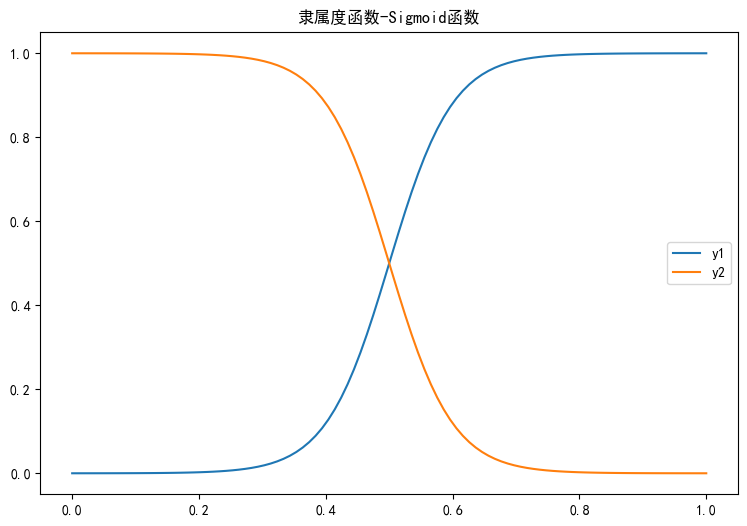

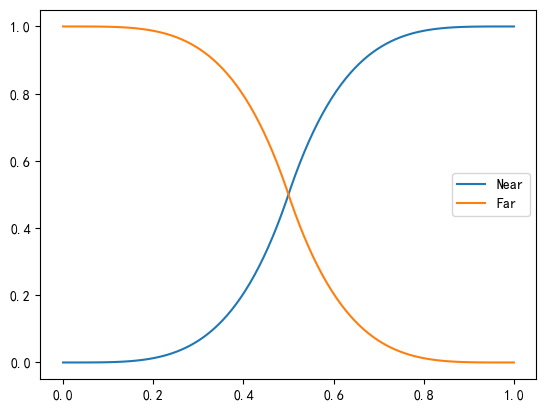

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
# from fuzzy import FuzzySystem

# # 定义模糊系统
# fs = FuzzySystem()

# # 设置输入变量
def function_1(x, k, x_min, x_max):
    ret = 0.0
    x_range = abs(x_max - x_min)
    u_x = (x - x_min) / x_range
    u_k = (k - x_min) / x_range
    x = u_x
    k = u_k
    if x <= 0:
        ret = 0.0
    elif x < k:
        ret = 2**3 * (x/(2*k))**4
    elif x < 2*k:
        ret = 1 - 2**3 * ((2*k - x)/(2*k))**4
    else:
        ret = 1.0
    return ret

def function_sigmod(x, k, x_min, x_max, slope = 20):
    x_range = abs(x_max - x_min)
    u_x = (x - x_min) / x_range
    u_k = (k - x_min) / x_range
    a = slope
    return 1 / (1 + math.exp(-a*(u_x - u_k)))

### 测试函数, 并绘制图像 ###
x_range = 1
x_min = 0
x_max = x_min + x_range
x = np.linspace(x_min, x_max, 100)
y1 = np.array([function_sigmod(i, 0.5, x_min, x_max) for i in x])
# y1 = np.array([function_sigmod(i, x_range/2+x_min, x_min, x_max) for i in x])
y2 = 1 - y1
plt.figure(figsize=(9,6))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题
plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')
plt.title('隶属度函数-Sigmoid函数')
plt.legend()
plt.show()
x = np.linspace(x_min, x_max, 100)
y1 = np.array([function_1(i, x_range/2+x_min , x_min, x_max) for i in x])
y2 = 1 - y1
plt.plot(x, y1, label='Near')
plt.plot(x, y2, label='Far')

plt.legend()
plt.show()
# # 测试模糊系统


最终选用sigmod函数作为隶属度函数

### 定义模糊系统 ###
规则表 <br>
![alt text](image-1.png)

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import math

class FuzzySystem:
    def __init__(self):
        # goal 
        self.range_goal = [0, 3]
        self.k_goal = 1.5
        self.ms_goal = [0.0, 0.0] # near, far
        # d_phi
        self.range_d_phi = [0, math.pi]
        self.k_d_phi = math.pi / 6
        self.ms_d_phi = [0, 0] # near, far
        # obstacle
        self.range_obstacle = [0, 1]
        self.k_obstacle = 0.6
        self.ms_obstacle = [0, 0] # near, far
        
    def function_sigmod(self, x, k, x_min, x_max, slope = 20):
        x_range = abs(x_max - x_min)
        u_x = (x - x_min) / x_range
        u_k = (k - x_min) / x_range
        a = slope
        value = 1 / (1 + math.exp(-a*(u_x - u_k)))
        return 1 - value, value # near, far

    def fuzzification(self, goal, d_phi, obstacle): 
        ## fuzzification
        # goal
        goal_near, goal_far = self.function_sigmod(goal, self.k_goal, self.range_goal[0], self.range_goal[1])
        self.ms_goal = [goal_near, goal_far]
        print(f'goal:   N: {self.ms_goal[0]:.3f}, F: {self.ms_goal[1]:.3f}')
        # d_phi
        d_phi_near, d_phi_far = self.function_sigmod(d_phi, self.k_d_phi, self.range_d_phi[0], self.range_d_phi[1])
        self.ms_d_phi = [d_phi_near, d_phi_far]
        print(f'd_phi:  N: {self.ms_d_phi[0]:.3f}, F: {self.ms_d_phi[1]:.3f}')
        # obstacle
        obstacle_near, obstacle_far = self.function_sigmod(obstacle, self.k_obstacle, self.range_obstacle[0], self.range_obstacle[1])
        self.ms_obstacle = [obstacle_near, obstacle_far]
        print(f'obs:    N: {self.ms_obstacle[0]:.3f}, F: {self.ms_obstacle[1]:.3f}')
        return self.ms_goal, self.ms_d_phi, self.ms_obstacle

    def rule_base(self, ms_goal, ms_d_phi, ms_obstacle):
        menbership = [
            [ms_goal[0], ms_d_phi[0], ms_obstacle[0]],
            [ms_goal[1], ms_d_phi[1], ms_obstacle[1]],
        ]
        # print(menbership[0])
        N = 0
        F = 1
        rules = [
            [N, F, N,],
            [F, F, N,],
            [N, F, F,],
            [F, F, F,],
            [N, N, N,],
            [F, N, N,],
            [N, N, F,],
            [F, N, F,],
        ]
        # print(rules[0][0])
        # print(menbership[rules[0][0]])
        goal_near, goal_far = ms_goal
        d_phi_near, d_phi_far = ms_d_phi
        obstacle_near, obstacle_far = ms_obstacle
        # print(f'menbership: {menbership[0][0]}')
        R1 = min(menbership[ rules[0][0] ][0], menbership[ rules[0][1] ][1], menbership[ rules[0][2] ][2])
        R2 = min(menbership[ rules[1][0] ][0], menbership[ rules[1][1] ][1], menbership[ rules[1][2] ][2])
        R3 = min(menbership[ rules[2][0] ][0], menbership[ rules[2][1] ][1], menbership[ rules[2][2] ][2])
        R4 = min(menbership[ rules[3][0] ][0], menbership[ rules[3][1] ][1], menbership[ rules[3][2] ][2])
        R5 = min(menbership[ rules[4][0] ][0], menbership[ rules[4][1] ][1], menbership[ rules[4][2] ][2])
        R6 = min(menbership[ rules[5][0] ][0], menbership[ rules[5][1] ][1], menbership[ rules[5][2] ][2])
        R7 = min(menbership[ rules[6][0] ][0], menbership[ rules[6][1] ][1], menbership[ rules[6][2] ][2])
        R8 = min(menbership[ rules[7][0] ][0], menbership[ rules[7][1] ][1], menbership[ rules[7][2] ][2])
        # print(f'R1: {R1}')
        return [R1, R2, R3, R4, R5, R6, R7, R8]

    def defuzzification(self, rules):
        U1 = 0.1
        U2 = 0.1
        U3 = 0.4
        U4 = 0.8
        U5 = 1.0 - U4
        U6 = 1.0 - U3
        U7 = 1.0 - U2
        U8 = 1.0 - U1
        # print(rules[0])
        U_output = U1*rules[0] + U2*rules[1] + U3*rules[2] + U4*rules[3] + U5*rules[4] + U6*rules[5] + U7*rules[6] + U8*rules[7]
        return U_output

    def inference(self, goal, d_phi, obstacle):
        ms_goal, ms_d_phi, ms_obstacle = self.fuzzification(goal, d_phi, obstacle)
        rules = self.rule_base(ms_goal, ms_d_phi, ms_obstacle)
        print(f'R1: {rules[0]:.3f}, R2: {rules[1]:.3f}, R3: {rules[2]:.3f}, R4: {rules[3]:.3f}, R5: {rules[4]:.3f}, R6: {rules[5]:.3f}, R7: {rules[6]:.3f}, R8: {rules[7]:.3f}')
        output = self.defuzzification(rules)
        return output


#### 测试模糊系统 ####
![alt text](image-2.png) <br>
![alt text](image-3.png)

In [213]:

### 测试模糊系统 ###
fs = FuzzySystem()
goal = 10
d_phi = math.pi / 4
obstacle = 10
output = fs.inference(goal, d_phi, obstacle)
print(output)

# # 测试隶属度函数
# import numpy as np
# import matplotlib.pyplot as plt

# def function_1(x, k, x_min, x_max):
#     x_range = abs(x_max - x_min)

   

goal:   N: 0.000, F: 1.000
d_phi:  N: 0.159, F: 0.841
obs:    N: 0.000, F: 1.000
R1: 0.000, R2: 0.000, R3: 0.000, R4: 0.841, R5: 0.000, R6: 0.000, R7: 0.000, R8: 0.159
0.8158869104880915
